In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
imagePath = 'D:\Photos\my_photo.jpg'

In [3]:
img = cv2.imread(imagePath)

In [4]:
img.shape

(735, 550, 3)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
gray_image.shape

(735, 550)

In [7]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [8]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 549.5, 734.5, -0.5)

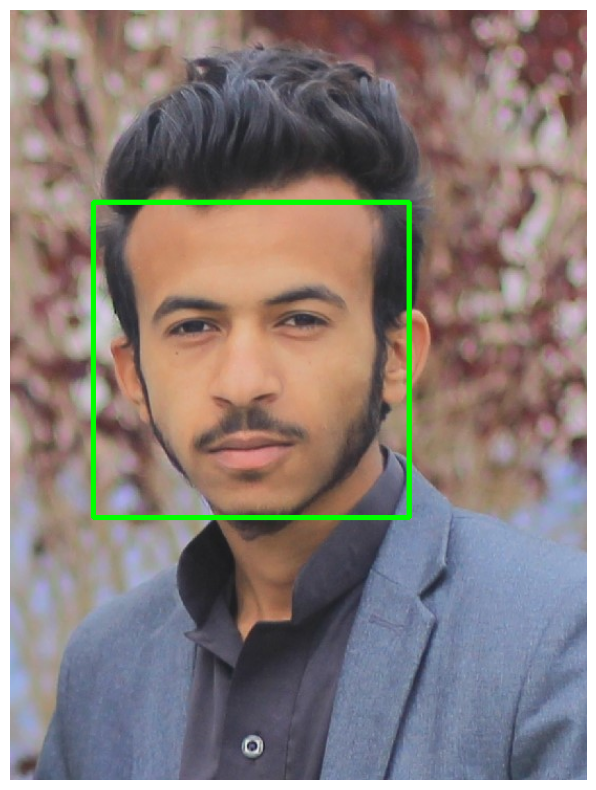

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

# Real-Time Face Detection with OpenCV

In [12]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [13]:
video_capture = cv2.VideoCapture(0)

In [14]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [15]:
while True:

    result, video_frame = video_capture.read()
    if result is False:
        break

    faces = detect_bounding_box(
        video_frame
    )

    cv2.imshow(
        "My Face Detection Project", video_frame
    )

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()